In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
observations = 10000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10,10,(observations,1))

generated_inputs = np.column_stack((xs,zs))
noise = np.random.uniform(-1,1,(observations,1))
generated_targets = 2 * xs - 3 * zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets = generated_targets)


In [3]:
training_data = np.load('TF_intro.npz')
training_data

In [4]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
    # Dense implements output = dot(input, weights) + bias
    tf.keras.layers.Dense(output_size,
              kernel_initializer = tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
              bias_initializer = tf.random_uniform_initializer(minval=-0.1, maxval=0.1))
])

#sgd = stochastic gradient descent 

custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.005)

#mean squared error = l2-norm divided by number of observations
#alternative is Huber loss for outliers (not squared), syntax is "huber_loss"
model.compile(optimizer=custom_optimizer, loss="mean_squared_error")

model.fit(training_data['inputs'], training_data['targets'], epochs=50, verbose=2)

Epoch 1/50
313/313 - 1s - loss: 6.8174
Epoch 2/50
313/313 - 0s - loss: 0.3458
Epoch 3/50
313/313 - 0s - loss: 0.3380
Epoch 4/50
313/313 - 0s - loss: 0.3372
Epoch 5/50
313/313 - 0s - loss: 0.3363
Epoch 6/50
313/313 - 0s - loss: 0.3385
Epoch 7/50
313/313 - 0s - loss: 0.3380
Epoch 8/50
313/313 - 0s - loss: 0.3373
Epoch 9/50
313/313 - 0s - loss: 0.3366
Epoch 10/50
313/313 - 0s - loss: 0.3371
Epoch 11/50
313/313 - 0s - loss: 0.3369
Epoch 12/50
313/313 - 0s - loss: 0.3372
Epoch 13/50
313/313 - 0s - loss: 0.3379
Epoch 14/50
313/313 - 0s - loss: 0.3371
Epoch 15/50
313/313 - 0s - loss: 0.3371
Epoch 16/50
313/313 - 0s - loss: 0.3384
Epoch 17/50
313/313 - 0s - loss: 0.3369
Epoch 18/50
313/313 - 0s - loss: 0.3372
Epoch 19/50
313/313 - 0s - loss: 0.3374
Epoch 20/50
313/313 - 0s - loss: 0.3372
Epoch 21/50
313/313 - 0s - loss: 0.3376
Epoch 22/50
313/313 - 0s - loss: 0.3377
Epoch 23/50
313/313 - 0s - loss: 0.3372
Epoch 24/50
313/313 - 0s - loss: 0.3384
Epoch 25/50
313/313 - 0s - loss: 0.3380
Epoch 26/

In [5]:
model.layers[0].get_weights()

[array([[ 2.00386  ],
        [-2.9922562]], dtype=float32), array([4.9977665], dtype=float32)]

In [6]:
model.predict_on_batch(training_data['inputs'])

array([[ 40.11313  ],
       [-13.3090515],
       [ 27.622072 ],
       ...,
       [ -7.110697 ],
       [-20.88842  ],
       [ 10.387188 ]], dtype=float32)

In [7]:
training_data['targets']

array([[ 40.53060125],
       [-14.22727137],
       [ 27.38984056],
       ...,
       [ -7.65601389],
       [-20.61845467],
       [  9.50191403]])

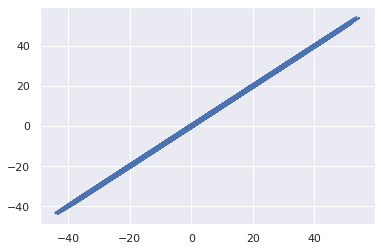

In [8]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.show()